In [5]:
#project to assess what features influence sediment accumulation in streams 
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('Final CER report stats download.csv')

In [50]:
#cleaning up data
df = df.replace('*', np.NaN)

df['Total Rainfall (mm)'] = df['Total Rainfall (mm)'].astype(float)
df['Brown Water Days'] = df['Brown Water Days'].astype(float)
df['Average Temperature'] = df['Average Temperature'].astype(float)
df['Sediment Accumulation'] = df['Sediment Accumulation'].astype(float)
df['Slope of Row'] = df['Slope of Row'].astype(float)

df['Plant Survivorship (Healthy)'] = df['Plant Survivorship (Healthy)'].str.strip('%')
df['Plant Survivorship (Healthy)'] = df['Plant Survivorship (Healthy)'].astype(float)

df = df.rename(columns= {'Code (1=Vetiver; 2=Pili; 3=Double Pili; 4=Coconut Courier; 5=Sandbag; 6=Living Sandbag; 7=Kickout; 8=Control)':'BMP1'})

In [51]:
df.head()

,Sample Date,Collection Label,BMP,BMP1,Sediment Accumulation,Slope of Row,Plant Survivorship (Healthy),Average Temperature,Total Rainfall (mm),Brown Water Days
0,2018.08.06,S1,V1,1,0.076842,NaN,NaN,NaN,NaN,NaN
1,2018.11.09,S2,V1,1,0.569244,NaN,NaN,77.366667,931.4,75.0
2,2019.02.08,S3,V1,1,0.850185,NaN,83.0,72.400000,764.8,29.0
3,2019.05.07,S4,V1,1,0.987605,NaN,64.0,71.300000,633.4,26.0
4,2019.08.12,S5,V1,1,0.995977,NaN,24.0,77.100000,214.8,6.0


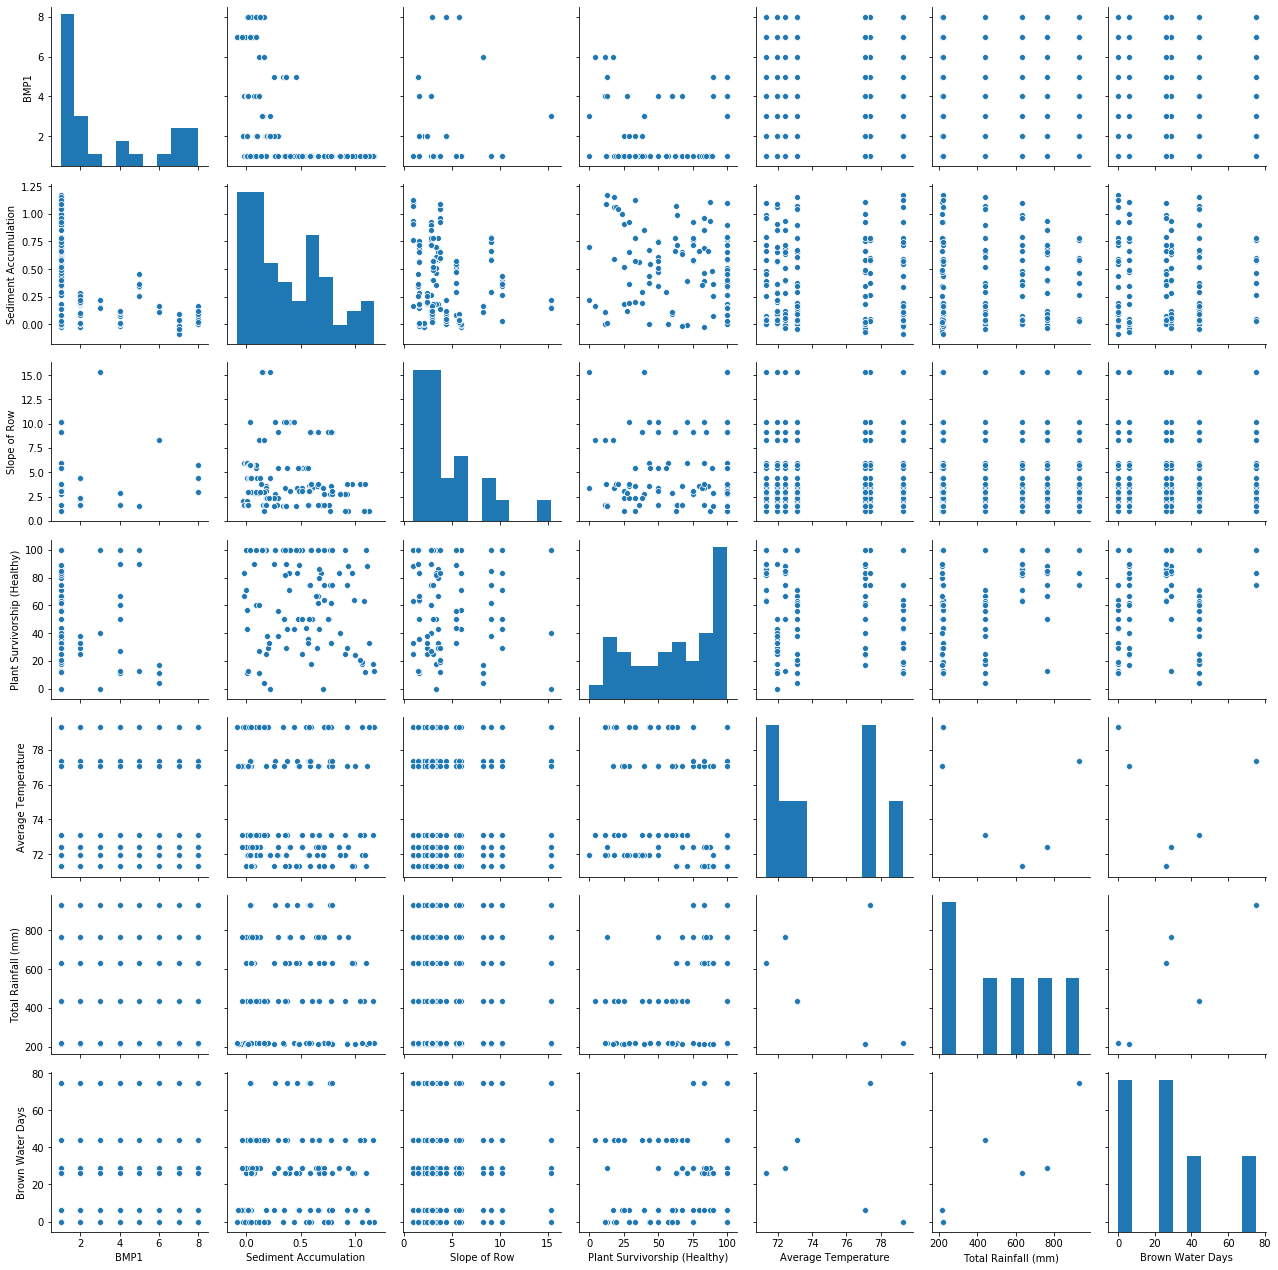

In [52]:
#exploratory data analysis on dataframe
import seaborn as sns
sns.pairplot(df)

In [53]:
#Creating linear regression line for Slope of Row vs. Sediment Accumulation
df1 = df[['Slope of Row', 'Sediment Accumulation']]
df1 = df1.dropna()
m, b = np.polyfit(df1['Slope of Row'], df1['Sediment Accumulation'], 1)

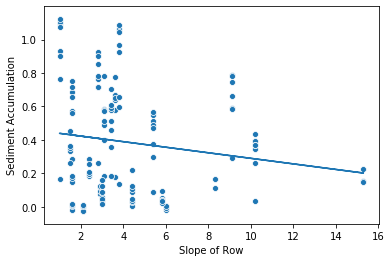

In [54]:
#Plotting Slope of Row vs. Sediment Accumulation
import matplotlib.pyplot as plt
sns.scatterplot(x = df1['Slope of Row'], y = df1['Sediment Accumulation'])
x= df1['Slope of Row']
plt.plot(x, m*x+b)

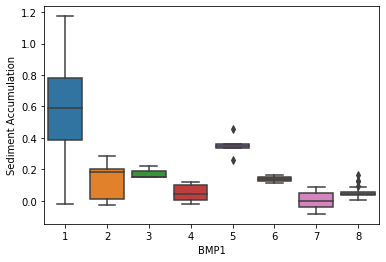

In [55]:
#create box plots for other relevant features
sns.boxplot(df['BMP1'], df['Sediment Accumulation'])

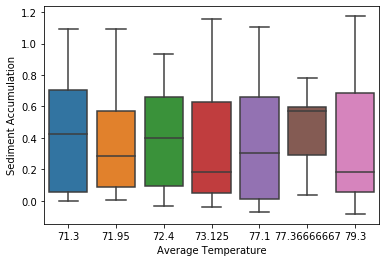

In [56]:
sns.boxplot(df['Average Temperature'], df['Sediment Accumulation'])

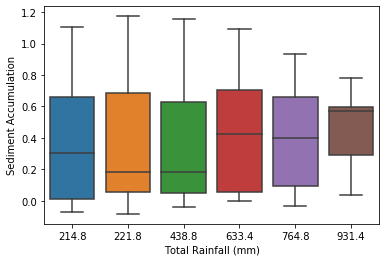

In [57]:
sns.boxplot(df['Total Rainfall (mm)'], df['Sediment Accumulation'])

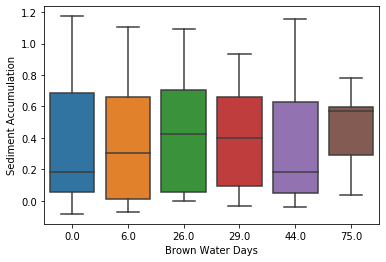

In [58]:
sns.boxplot(df['Brown Water Days'], df['Sediment Accumulation'])